# Лабораторная работа №2

<span style="font-family:Snell Roundhand, cursive; font-size:20px;">Круглова Виктория гр. 9382</span>

## Цель работы
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Задания

1) Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.

3) Построить сонограмму по записи своего голоса.

In [10]:
import matplotlib.pyplot as plt
import more_itertools as it
import numpy as np
from scipy.io import wavfile
from math import sqrt

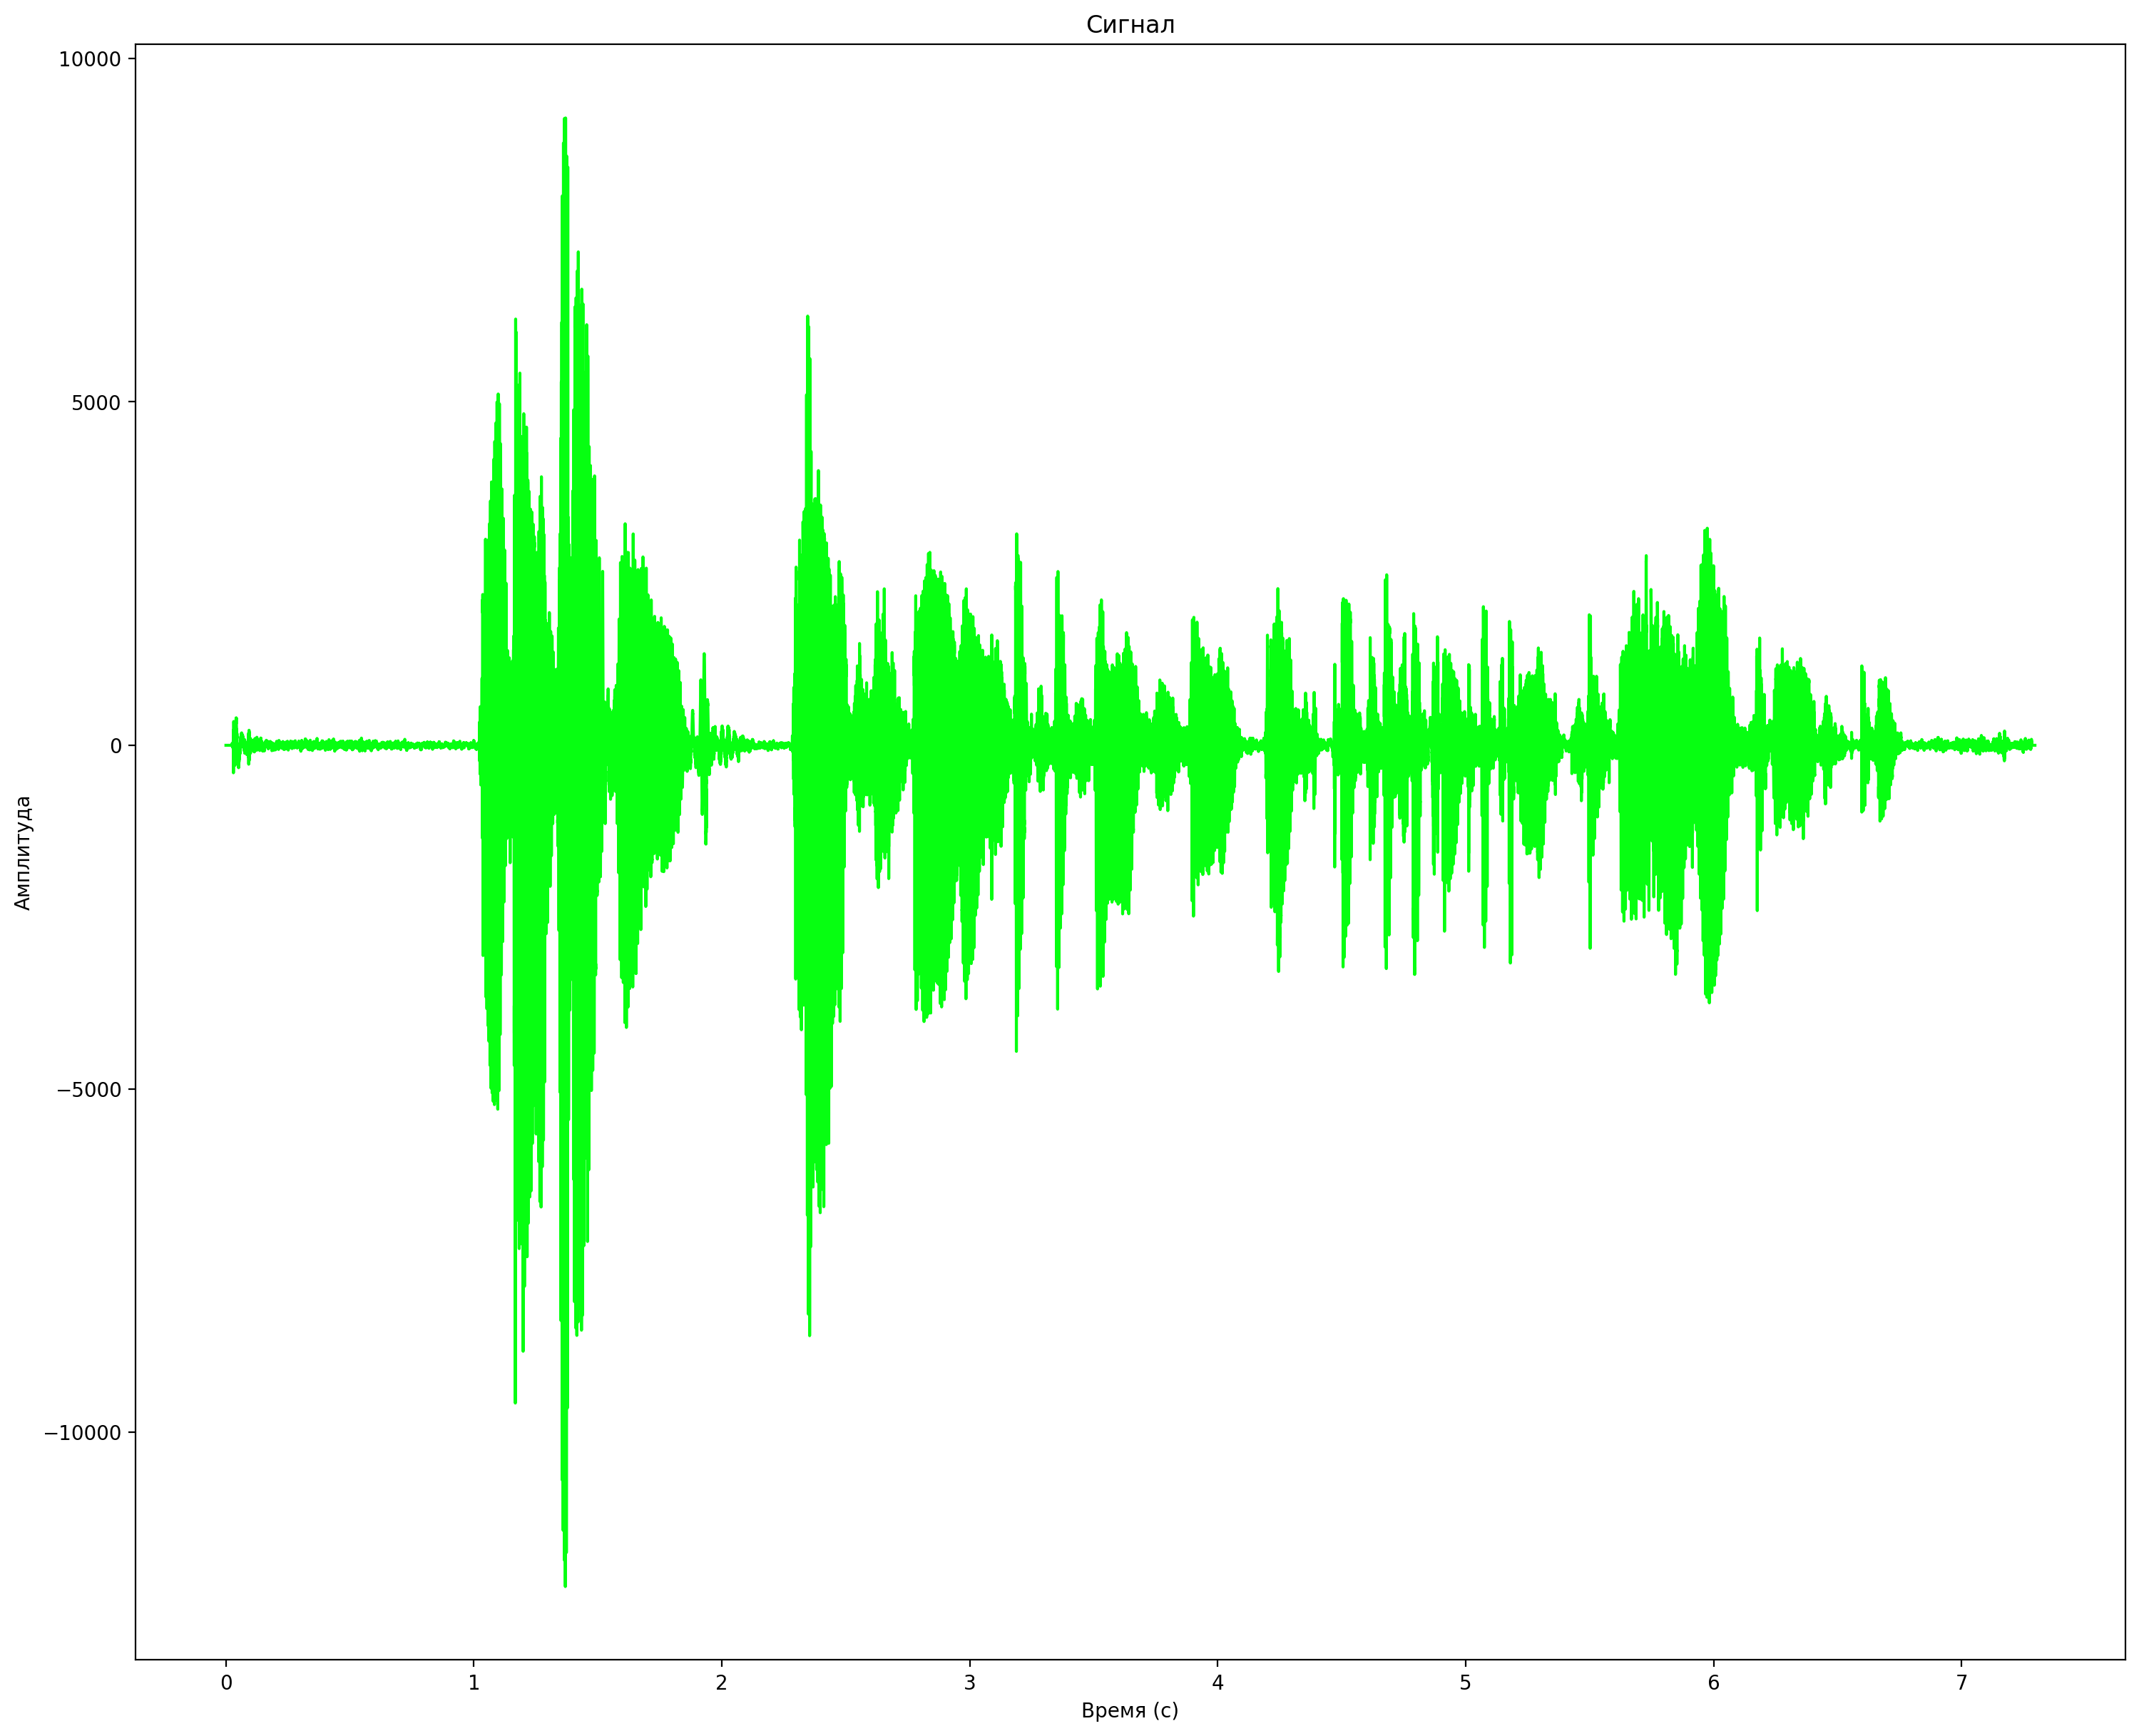

In [6]:
freq, signal = wavfile.read("voice.wav")

x_sig = np.linspace(0, len(signal) / freq, num=len(signal))
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams["figure.dpi"] = 200
plt.title("Сигнал")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
    
plt.plot(x_sig, signal, color='#06FF11')

## Построение траектории основного тона F0 на записи своего голоса, используя ДПФ

In [32]:
N = 256
#разобьем сигнал на отрезки длинной 0.25N
intervals = list(it.windowed(signal, n=N, step=int(0.25*N)))
#на последнем отрезке последние значения равны None, избавимся от них
intervals[-1] = [i for i in intervals[-1] if i]

#на каждом отрезке сигнал умножаем на окно Хемминга
intervals = [i*np.hamming(len(i)) for i in intervals]

#Функция вычисления ДПФ
def DFT(x):
    n = np.arange(len(x))
    k = n.reshape((len(x), 1))
    e = np.exp(-2j * np.pi * n * k / len(x)) 
    return np.dot(e, x)

dfts = [DFT(i) for i in intervals]

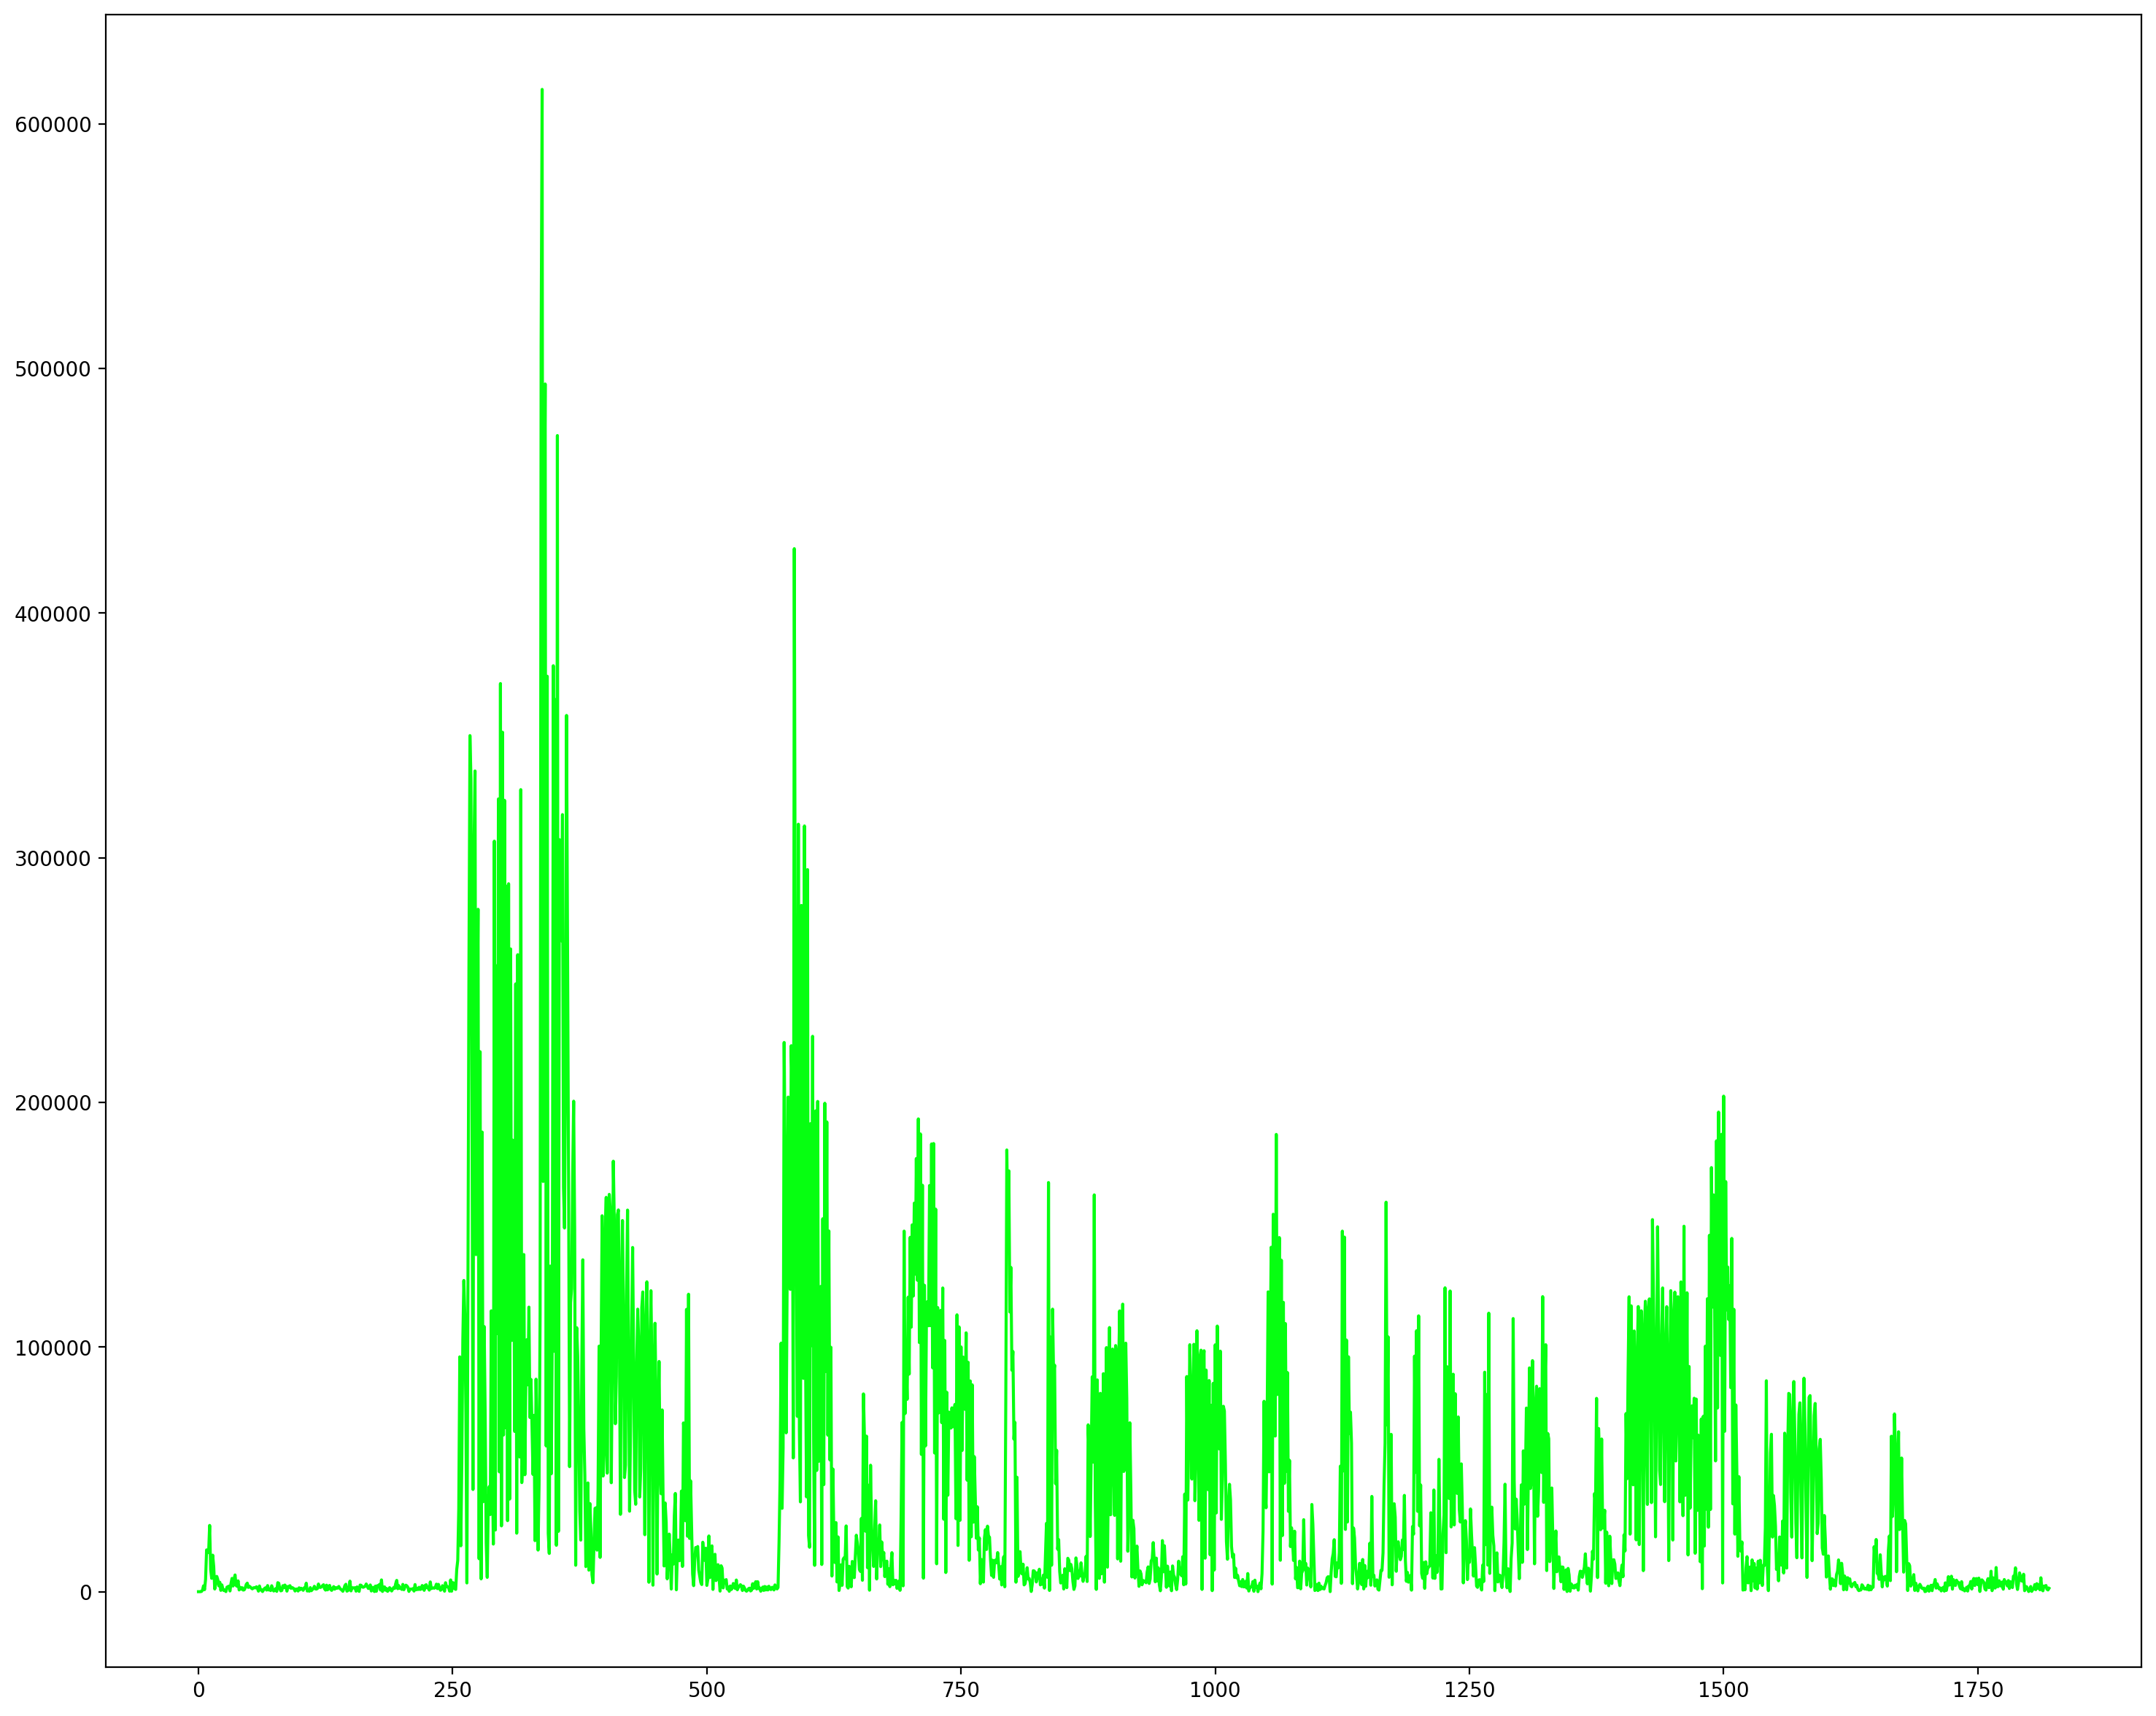

In [33]:
#Амплитудный спектр в интервале (0,N/2)
spectre = [(sum([i**2 for i in dft_interval[:int(len(dft_interval)/2)]])**0.5).real for dft_interval in dfts]
plt.plot(spectre, color='#06FF11')

### Построение форманты F0

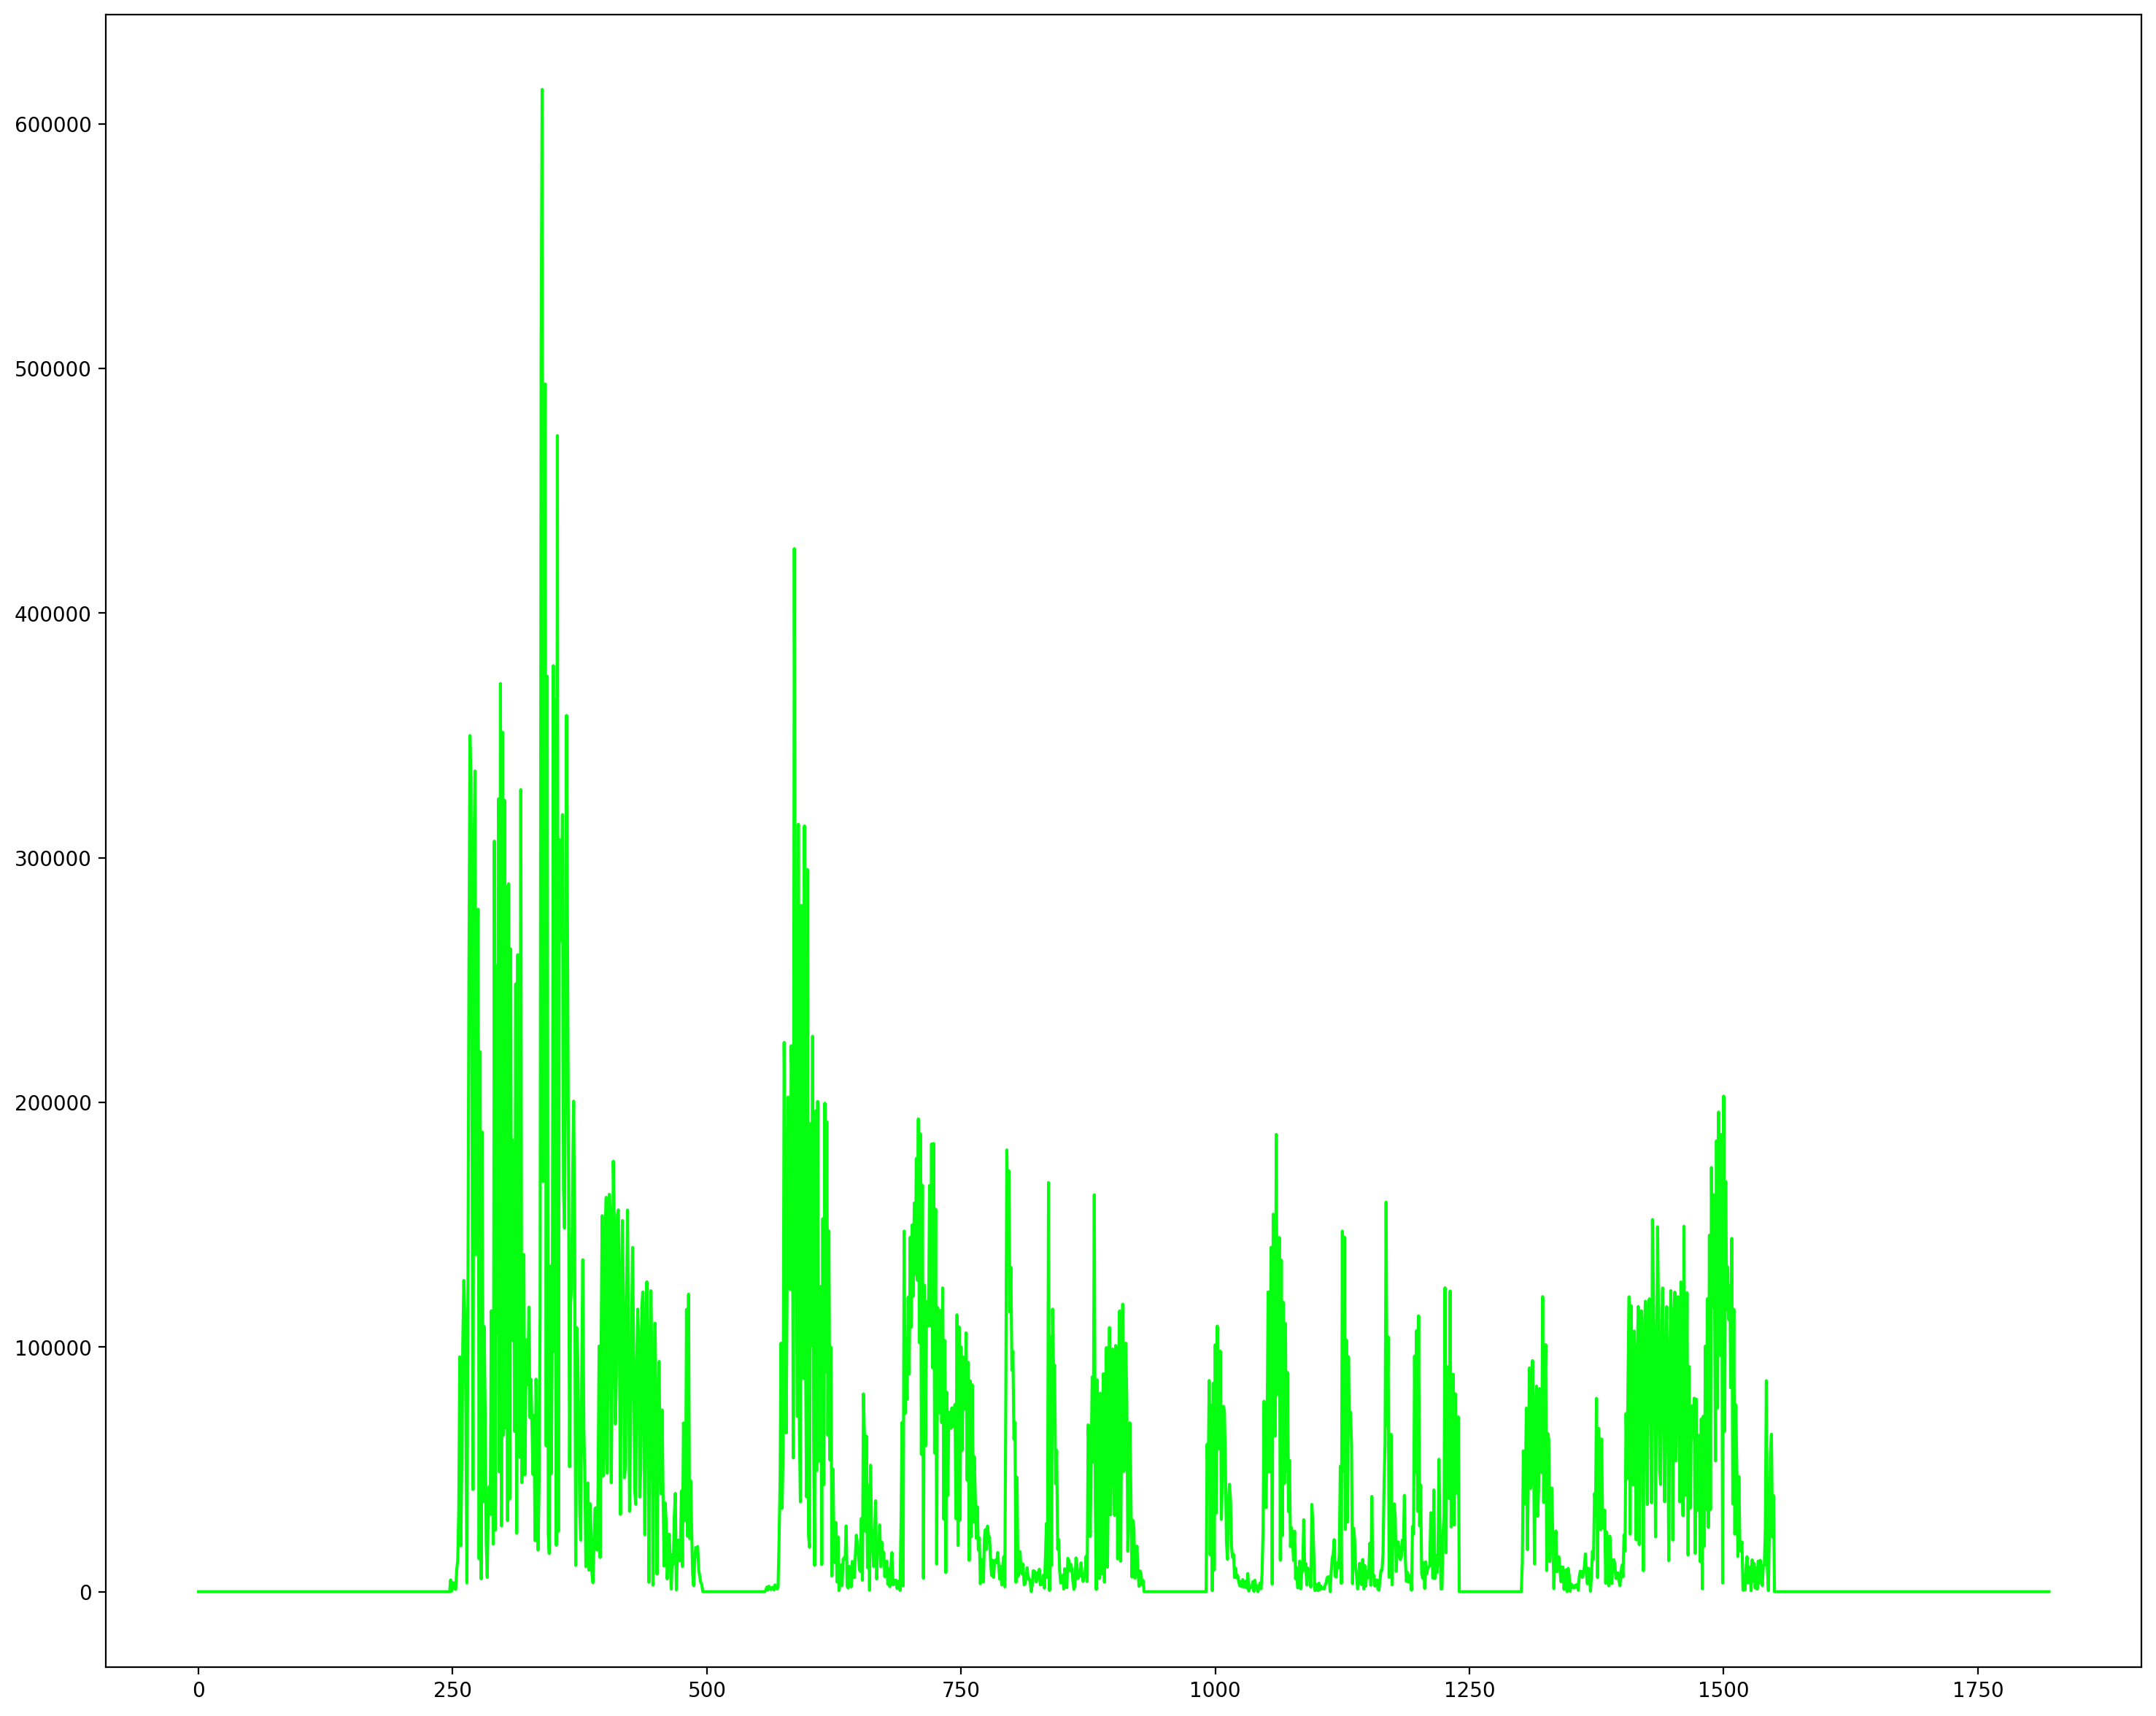

In [48]:
F0 = []
#делим на интервалы
arrs = list(it.windowed(spectre, n=round(freq/N), step=round(freq/N)))
#убираем None из конечных значений
arrs[-1] = [i for i in arrs[-1] if i]

for i in arrs:
    interval = np.array(i)
    if interval.max() > 1.17e5:            
        F0 += interval.tolist()
    else:
        F0 += [0 for i in range(len(interval))]
        
plt.plot(F0, color='#06FF11')

In [65]:
#функция для вычисления формант
def make_formant(F_init,num,j):
    F_new = []
    i = 1
    while i < round(len(F_init)/j)-1:
        max_current = max([F_init[j*i-1],F_init[j*i],F_init[j*i+1]])
        if F_init[i] > num*max_current:
            F_new += [max_current]
        else:
            F_new += [0]
        i += 1
    return F_new

### Построение форманты F1

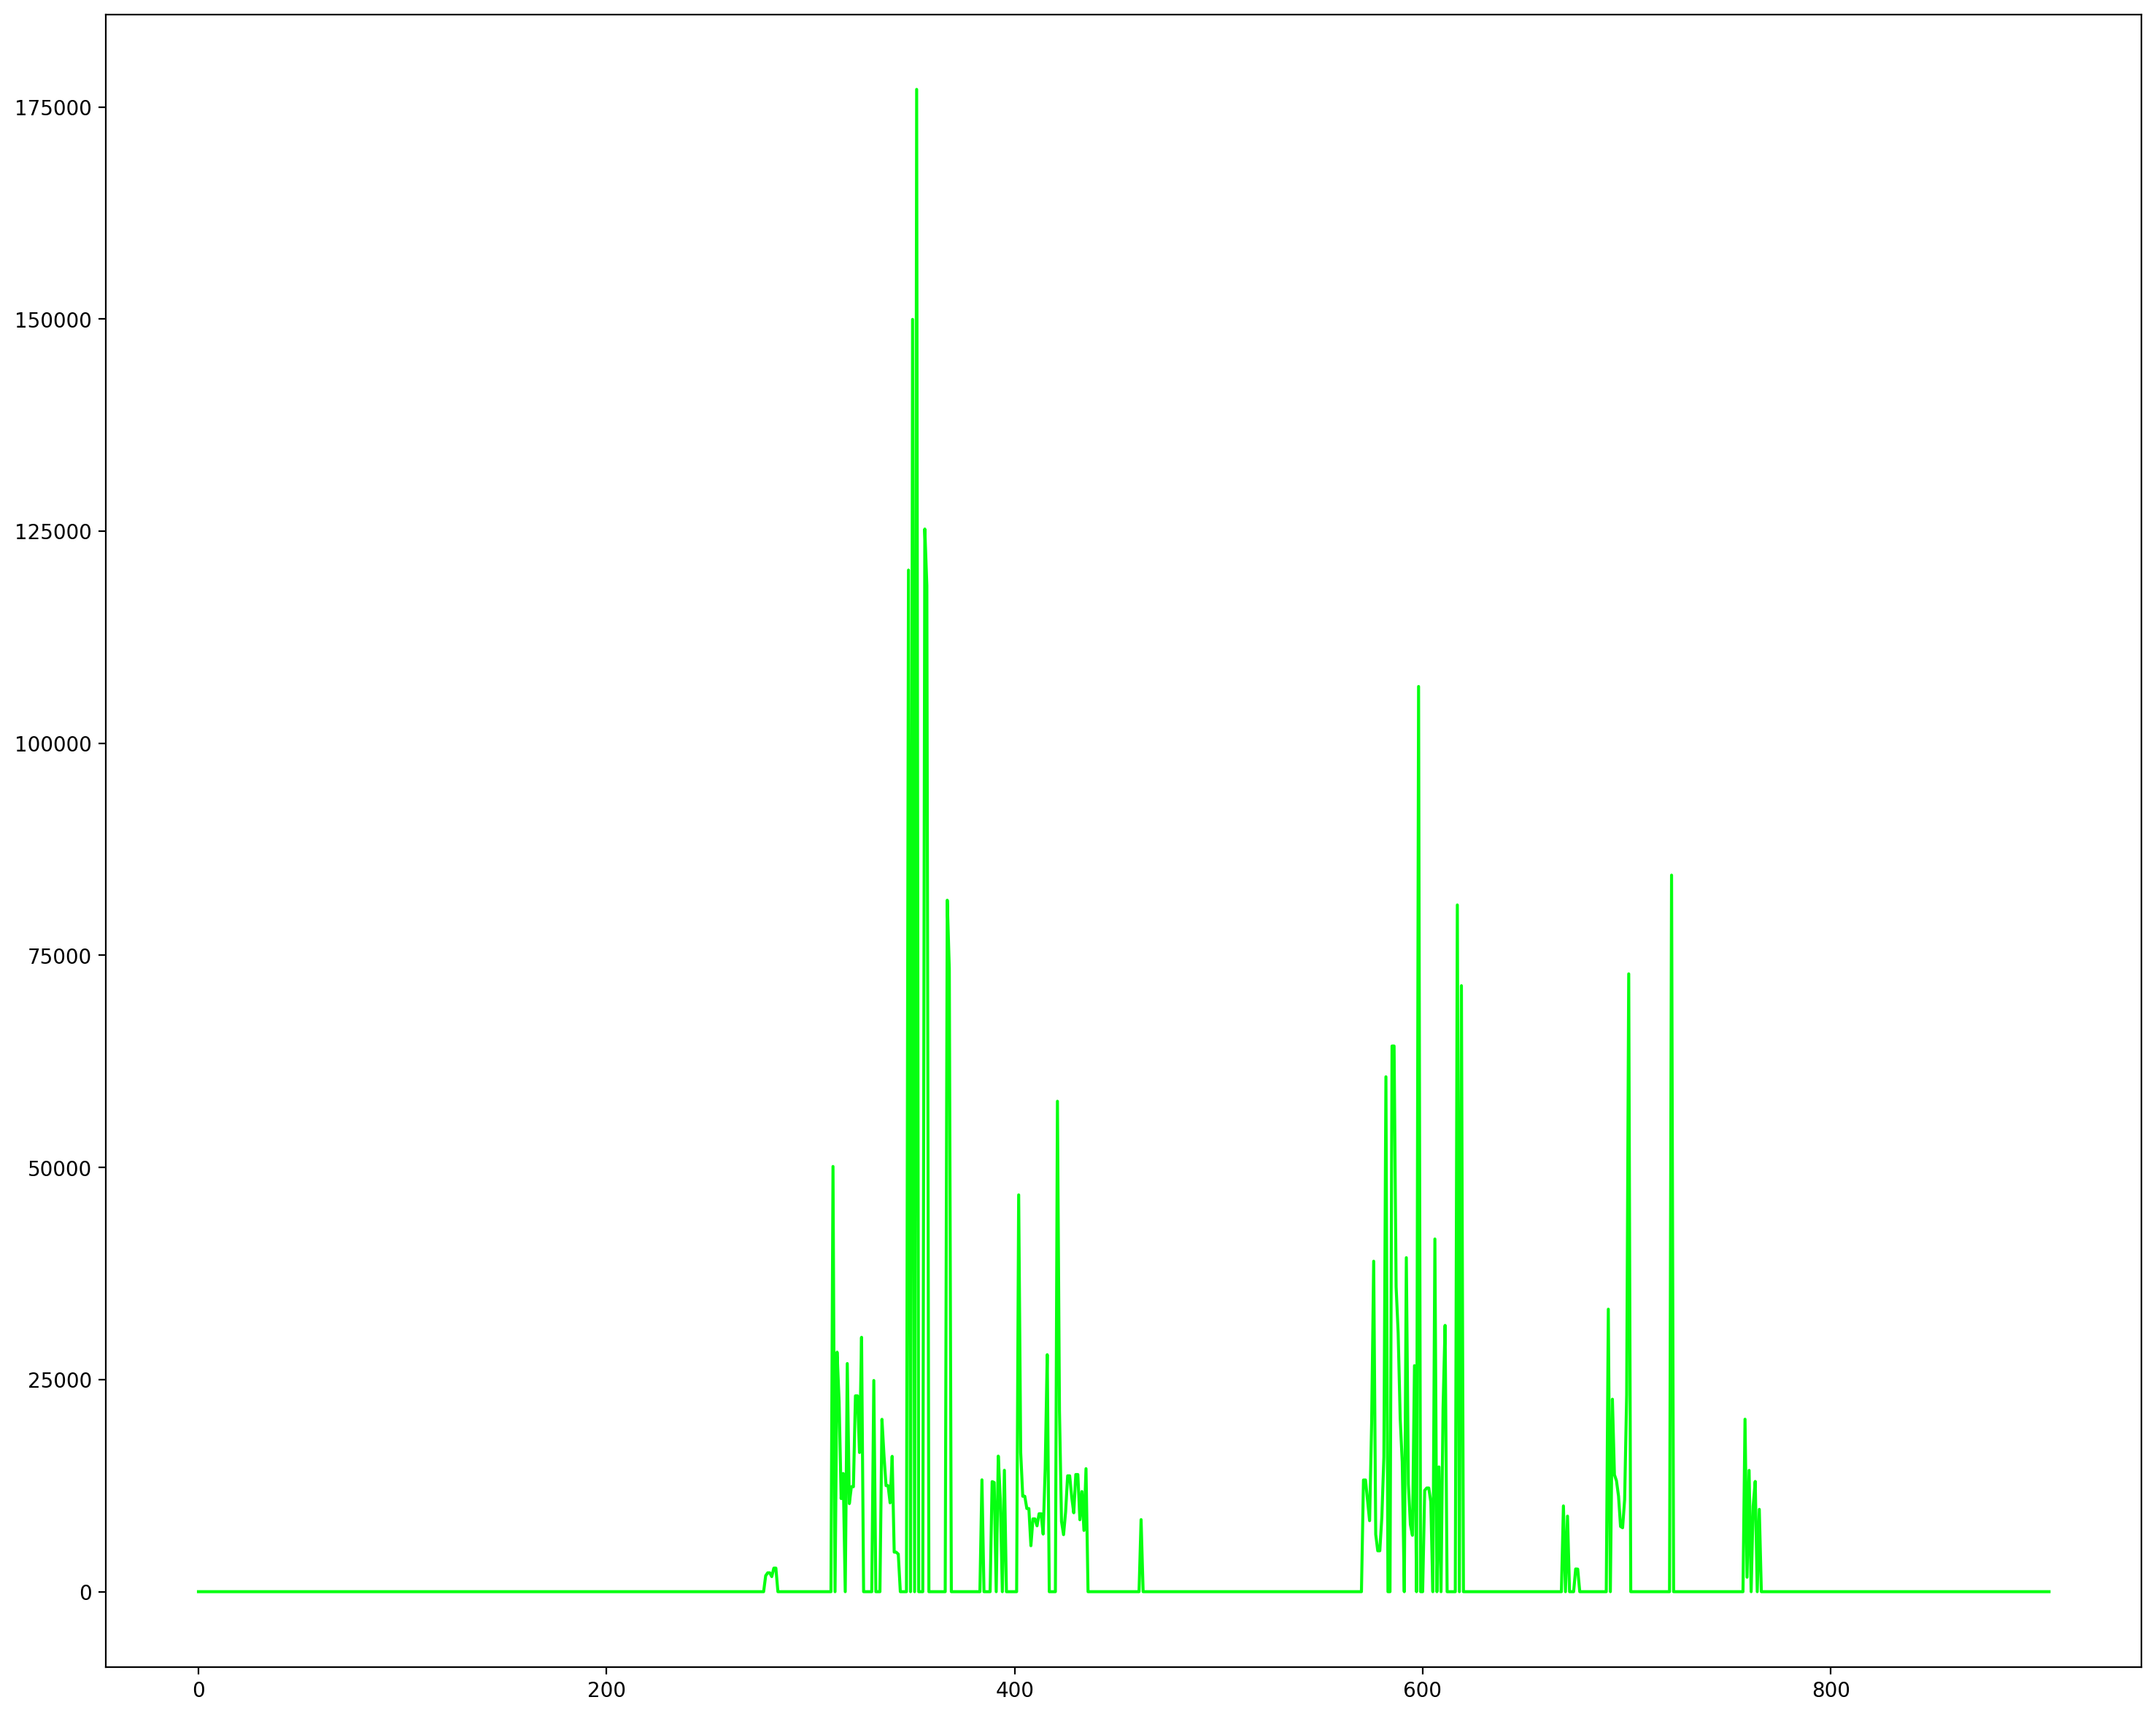

In [66]:
plt.plot(make_formant(F0,2,2), color='#06FF11')

### Построение форманты F2

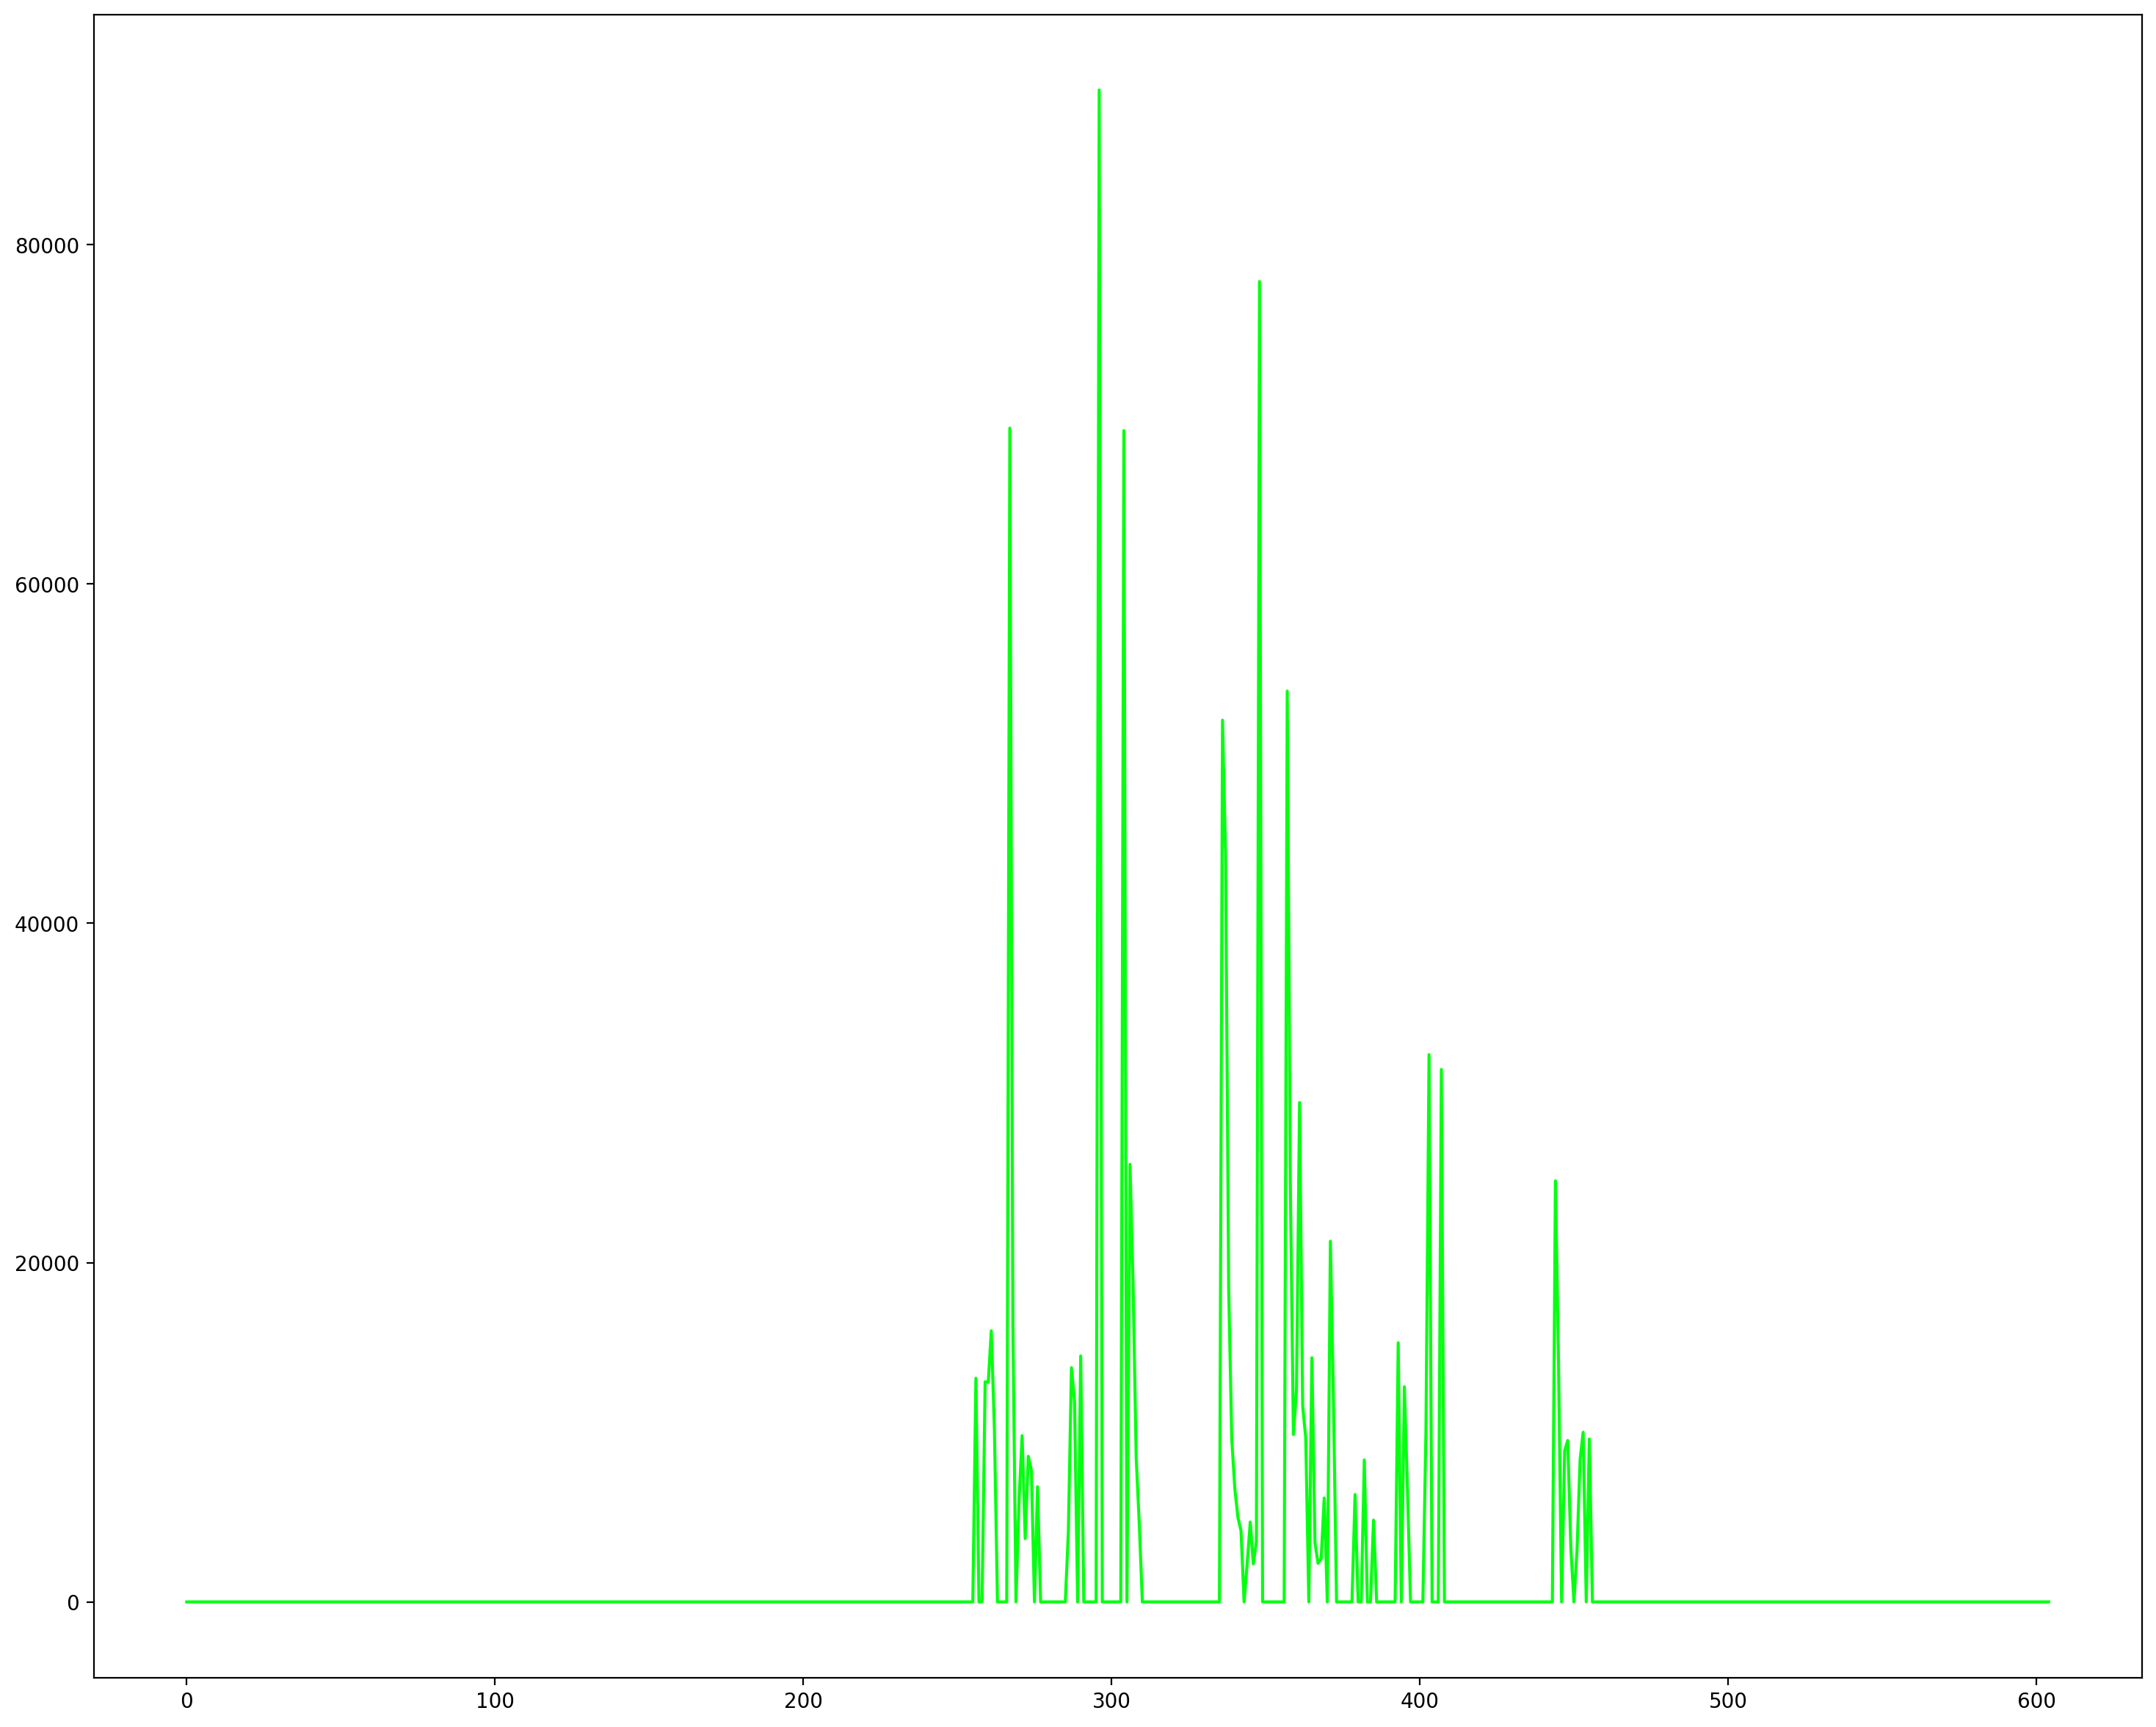

In [67]:
plt.plot(make_formant(F0,4,3), color='#06FF11')

### Построение форманты F3

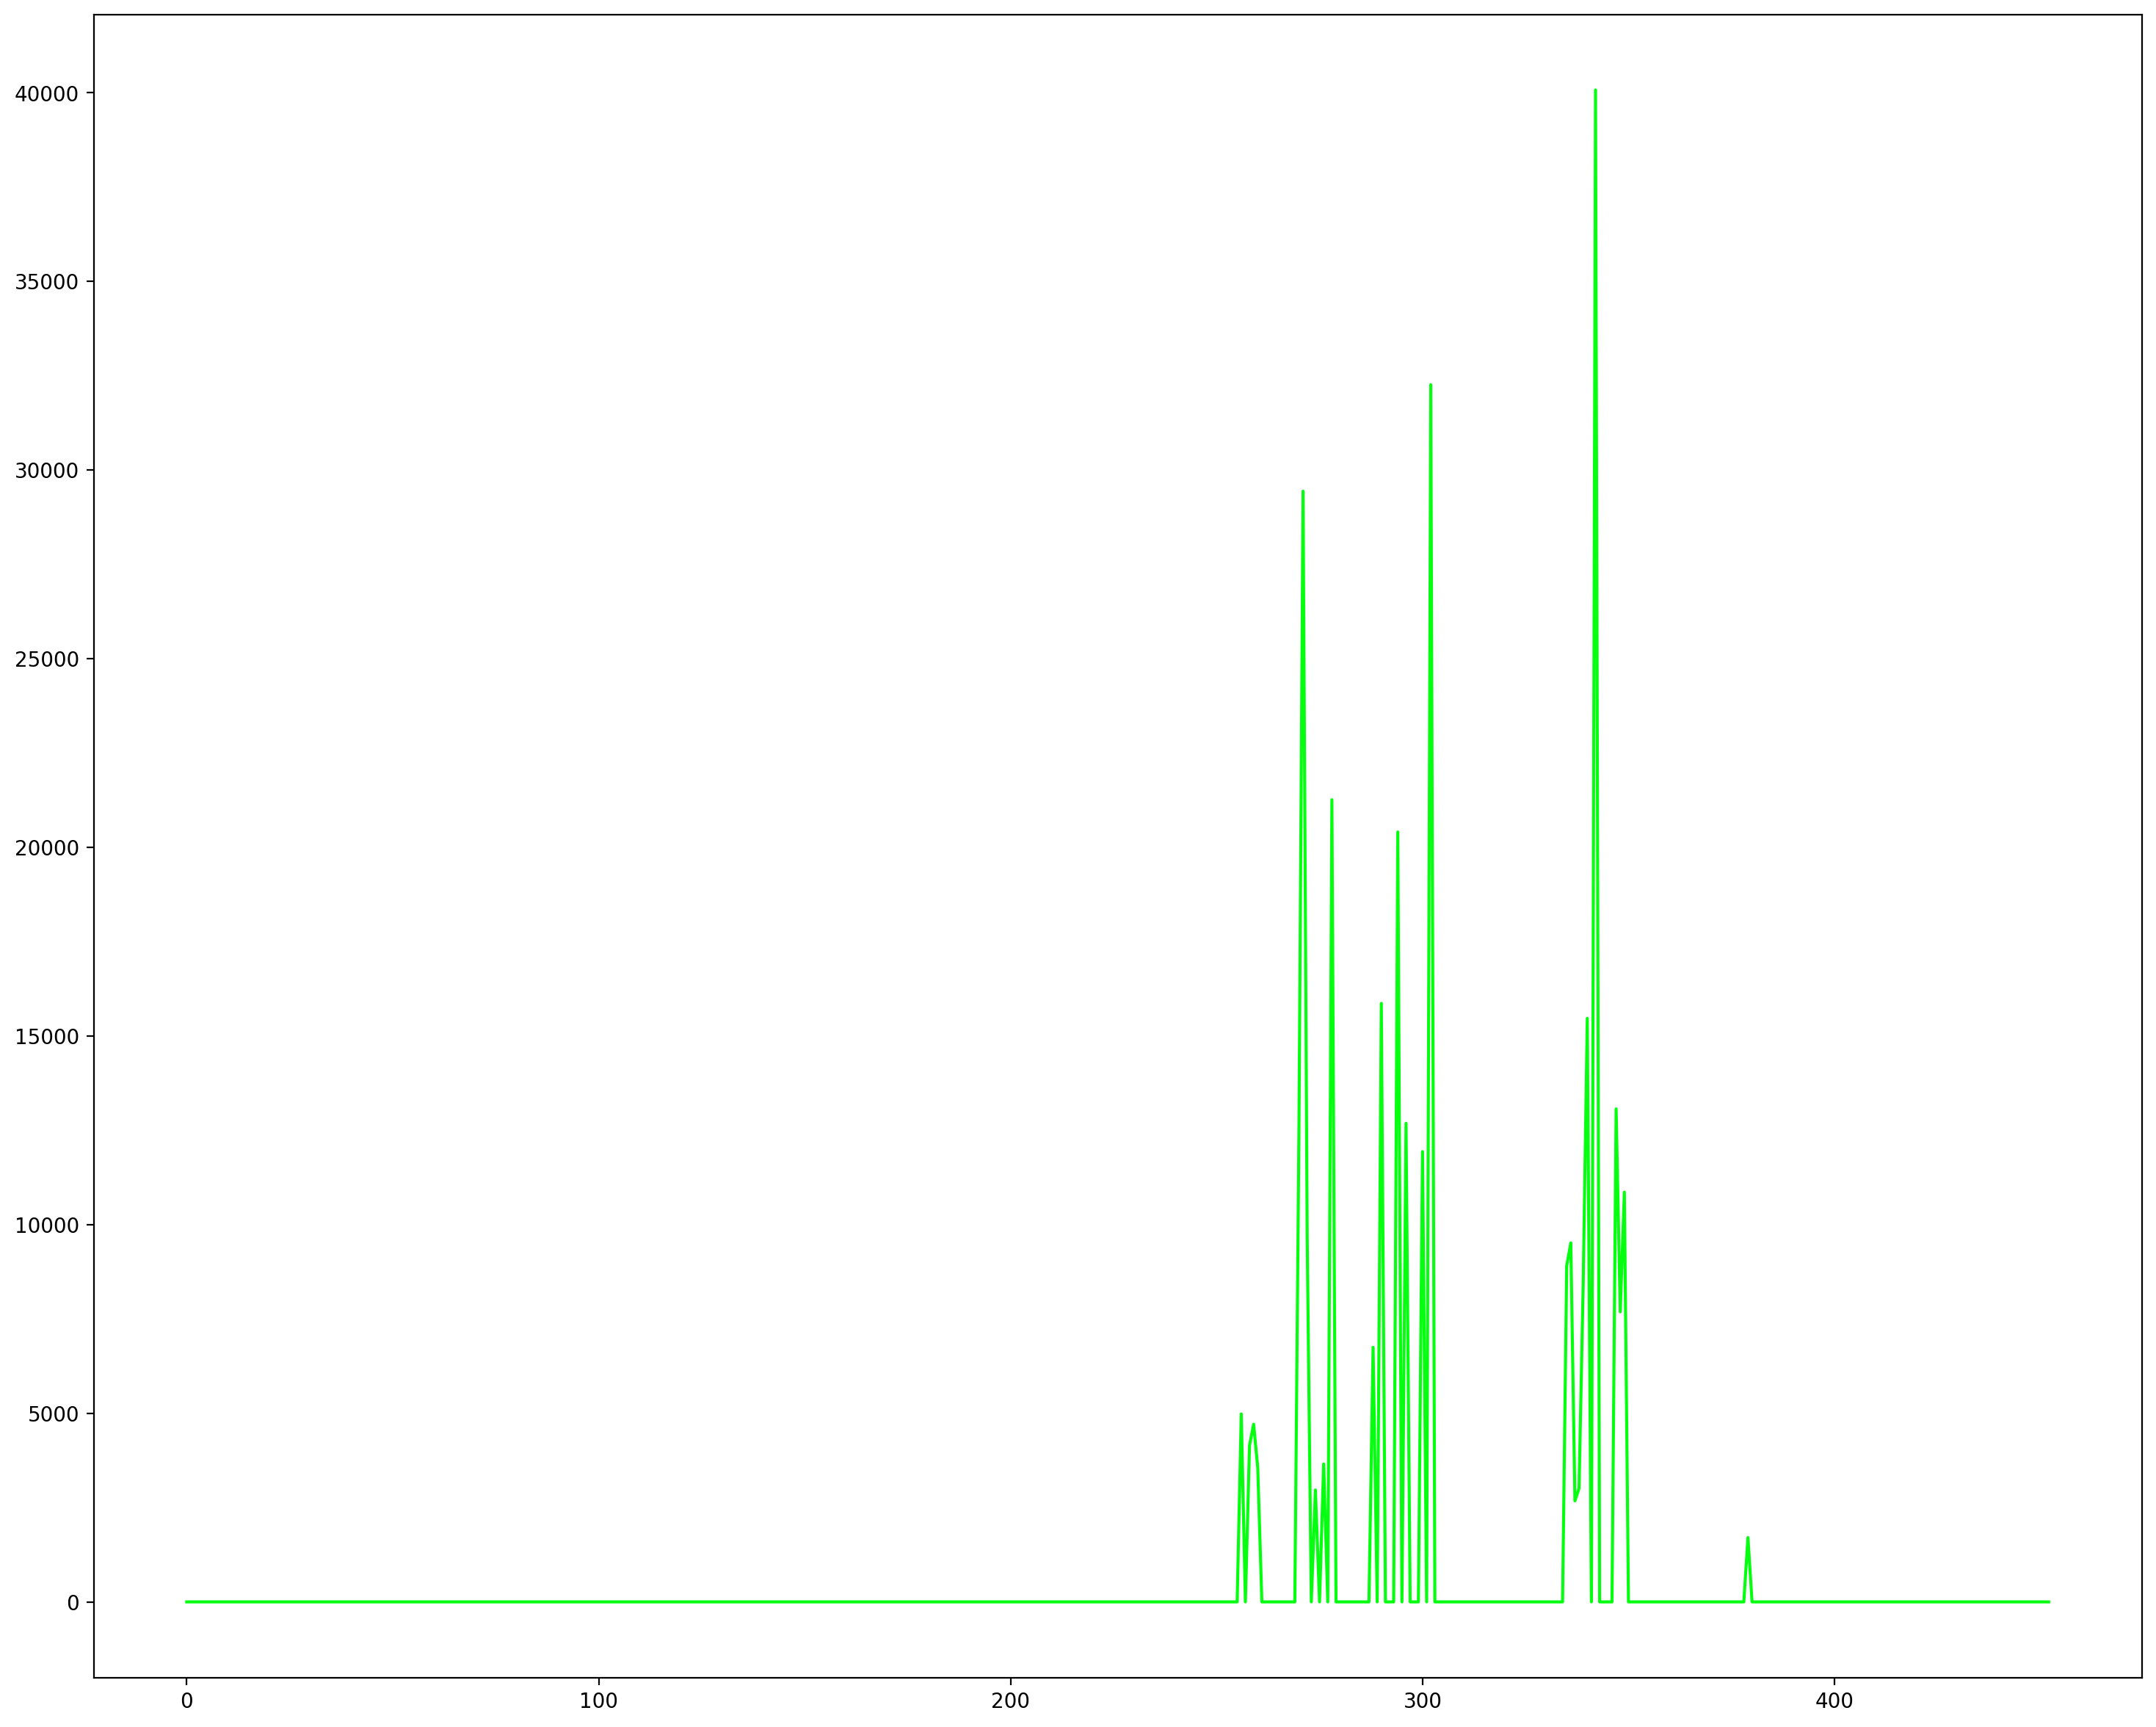

In [68]:
plt.plot(make_formant(F0,8,4), color='#06FF11')

## Построение сонограммы

In [81]:
import plotly.express as px
fig = px.imshow(np.array(arrs[:-1], dtype=float))

![title](spectrogramme.png)

## Вывод
По записи своего голоса были построены траектории основого тона (F0), второй, третьей и четвертой формантных частот используя ДПФ. Также была построена сонограмма записи голоса.